In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import json
import os.path
plt.rcParams['figure.figsize'] = 15, 5

# Data for Direction of Arrival with MUSIC
A part of *Statistical Signal and Data Processing through Applications* class at EPFL

## Experiment description
The experiment details are described at https://github.com/fakufaku/pyramic-dataset/blob/master/PROTOCOL.md.
The geometry of the experiment is described in the machine readable file https://github.com/fakufaku/pyramic-dataset/blob/master/protocol.json. Below is an example how to get the indexes of the top layer of microphone for 2D experiments.

In [ ]:
! wget https://raw.githubusercontent.com/fakufaku/pyramic-dataset/master/protocol.json

In [2]:
with open('protocol.json') as json_file:  
    protocol = json.load(json_file)
    
microphone_3D_locations = np.array(protocol['geometry']['microphones']['locations'])
top_mics = np.isclose(microphone_3D_locations[:,2], 0.06123724)
print("Total {} microphones on top flat layer,".format(np.sum(top_mics)))
print("at indexes indexes: ", np.arange(len(top_mics))[top_mics])

microphone_2D_locations = microphone_3D_locations[top_mics, :2]

speaker_distance = protocol['geometry']['speakers']['location']['middle']['distance']
print("First speaker distance from the center of the array: {}m".format(speaker_distance))

Total 24 microphones on top flat layer,
at indexes indexes:  [ 8  9 10 11 12 13 14 15 24 25 26 27 28 29 30 31 40 41 42 43 44 45 46 47]
First speaker distance from the center of the array: 3.944m


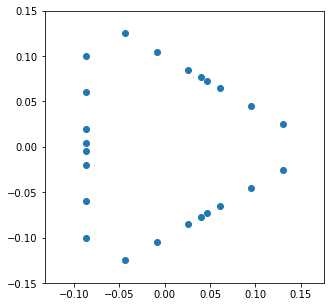

In [3]:
plt.figure(figsize=(5, 5))
plt.scatter(*microphone_2D_locations.T)
plt.axis("equal")
plt.show()

## Data

Instructions how to download and use data are at https://github.com/fakufaku/pyramic-dataset#download-the-dataset. 

Since we are interested in the 2D case, we are interested only in the first speaker (index 0), so you can remove
files that have `spkr1` and `spkr2` in the name.

For each speaker and type of sound, there are 180 different directions of arrival available to test the algorithm.
Since each file contains sound from only one mike, in order to test algorithm on multiple sources, you have to add
recordings from different files.

Below is an example how to load a single `.wav` file. The file contains recordings of all 48 microphones, and you need only the top ones. You can also take only some of the top micrphones, but remember that they can't all lay one one line.

sampling rate: 48000


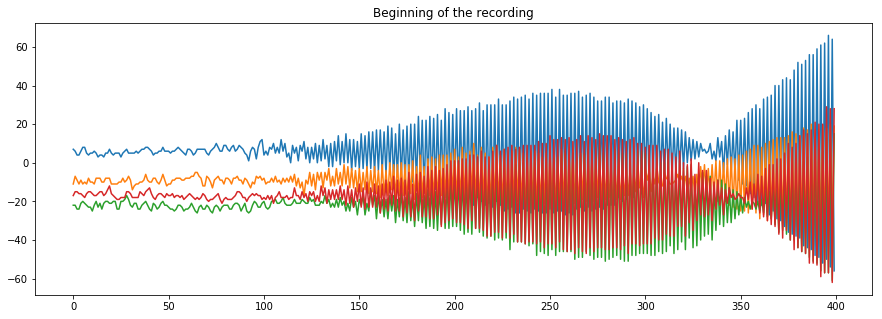

In [7]:
if os.path.exists('segmented/sweep_lin/'):
    rate, data = wavfile.read('segmented/sweep_lin/sweep_lin_spkr0_angle262.wav')
    print("sampling rate: {}".format(rate))
    data_2D = data[:, top_mics]
    plt.plot(data_2D[:400,:4])
    plt.title("Beginning of the recording")
    plt.show()
else: 
    print("You have to download the data yourself from https://github.com/fakufaku/pyramic-dataset#download-the-dataset !")
    print("But if you really do not want to do this yourself, you can run the last cell")

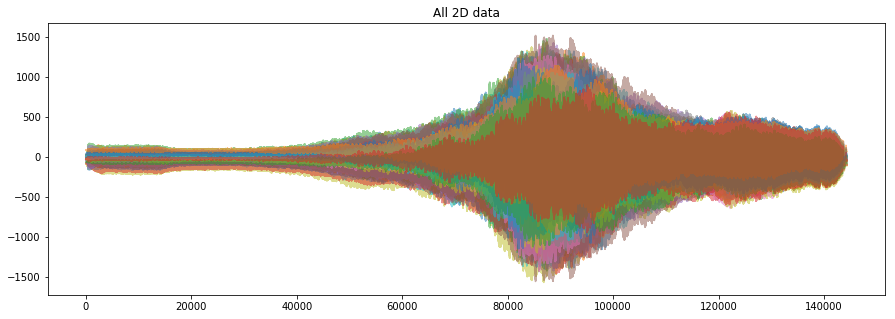

In [8]:
plt.plot(data_2D, alpha = 0.5)
plt.title("All 2D data")
plt.show()

You dont need to test data on all angels, types of signals and configurations. Pick a few and justify your choices. Have fun! :)

**The cell below downloads and extracts all the data (on linux), you are running it on your own responsibility**

In [ ]:
# This will download all the segmented samples
!wget -qO- https://zenodo.org/record/1209563/files/pyramic_segmented_fq_sample0.tar.gz | tar xzv
!wget -qO- https://zenodo.org/record/1209563/files/pyramic_segmented_fq_sample1.tar.gz | tar xzv
!wget -qO- https://zenodo.org/record/1209563/files/pyramic_segmented_fq_sample2.tar.gz | tar xzv
!wget -qO- https://zenodo.org/record/1209563/files/pyramic_segmented_fq_sample3.tar.gz | tar xzv
!wget -qO- https://zenodo.org/record/1209563/files/pyramic_segmented_fq_sample4.tar.gz | tar xzv
!wget -qO- https://zenodo.org/record/1209563/files/pyramic_segmented_silence.tar.gz | tar xzv
!wget -qO- https://zenodo.org/record/1209563/files/pyramic_segmented_sweep_exp.tar.gz | tar xzv
!wget -qO- https://zenodo.org/record/1209563/files/pyramic_segmented_sweep_lin.tar.gz | tar xzv
!wget -qO- https://zenodo.org/record/1209563/files/pyramic_segmented_noise.tar.gz | tar xzv